In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
df = pd.read_csv(r'E:\titanic\train.csv')

df['Age'].fillna(df['Age'].mean(),inplace=True)
x1=df[["PassengerId","Pclass","Age","SibSp","Fare"]].values
y1=df[["Survived"]].values
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=42)
#print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
base_pred = np.mean(y_test)

base_pred = np.repeat(base_pred, len(y_test))
#base_pred

base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
#print(base_root_mean_square_error)

rf = RandomForestRegressor()
#flatten to convert 2d array to 1d array
y_train=y_train.flatten()

model_rf=rf.fit(X_train,y_train)

prediction_values = rf.predict(X_test)

rf_mse1=mean_squared_error(y_test,prediction_values)
rf_rmse1=np.sqrt(rf_mse1)
print(rf_rmse1)

#r squared value
r2_rf_test1=model_rf.score(X_test,y_test)
r2_rf_train1=model_rf.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

prediction_values#.round().astype(int)

df1 = pd.read_csv(r'E:\titanic\test.csv')
df1.fillna(df.mean(),inplace=True)
result_Set = df1[["PassengerId","Pclass","Age","SibSp","Fare"]]
result_Set = result_Set.values
result = rf.predict(result_Set)
#df1.isnull().sum()

rf_mse1=mean_squared_error(y_test,prediction_values)
rf_rmse1=np.sqrt(rf_mse1)
print(rf_rmse1)

#r squared value
r2_rf_test1=model_rf.score(X_test,y_test)
r2_rf_train1=model_rf.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

prediction_values#.round().astype(int)

result.round().astype(int)
dataset = pd.DataFrame({'Survived': result.round().astype(int)})

dataset =  pd.merge(df1.iloc[:, :1], dataset,  left_index=True, right_index=True)

dataset.to_csv(r'E:\titanic\submission.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [86]:
############ CATBOOST #############
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

df11 = pd.read_csv(r"E:\titanic\train.csv")
test = pd.read_csv(r"E:\titanic\test.csv")
train = df
#Identify the datatype of variables
#train.dtypes
clean_data(df11)
#Finding the missing values
corr=df11.corr()

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=corr,
                   x=corr.columns,
                   y=corr.columns,
                   hoverongaps = False))
fig.show()

In [6]:
#Imputing missing values for both train and test
df.fillna(train['Age'].median(),inplace=True)
df.fillna(train['Age'].median(),inplace=True)
#test.fillna(-999,inplace=True)


Text(0.5, 1.0, 'Embarked')

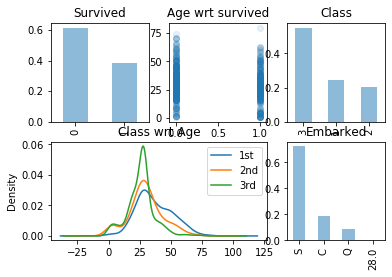

In [7]:
import matplotlib.pyplot as plt
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Survived')

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age,alpha=0.1)
plt.title('Age wrt survived')

plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Class')

plt.subplot2grid((2,3),(1,0),colspan=2)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind='kde')
plt.title('Class wrt Age')
plt.legend(('1st','2nd','3rd'))

plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Embarked')


Text(0.5, 1.0, 'Women survived')

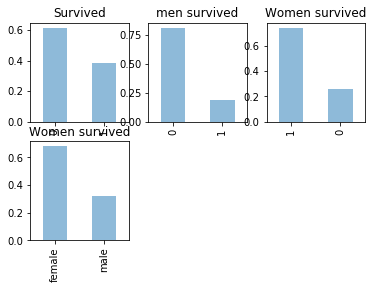

In [8]:
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Survived')

plt.subplot2grid((2,3),(0,1))
df.Survived[df.Sex == 'male'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('men survived')

plt.subplot2grid((2,3),(0,2))
df.Survived[df.Sex == 'female'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Women survived')

plt.subplot2grid((2,3),(1,0))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Women survived')


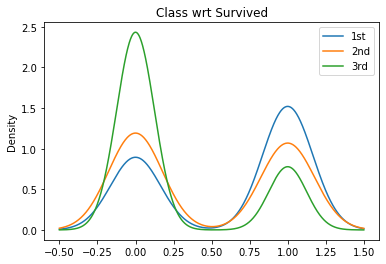

In [9]:
# plt.subplot2grid((2,3),())
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind='kde')
plt.title('Class wrt Survived')
plt.legend(('1st','2nd','3rd'))
    

Text(0.5, 1.0, 'poor men survived')

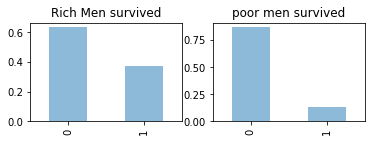

In [10]:
plt.subplot2grid((2,2),(0,0))
df.Survived[(df.Sex == 'male') & (df.Pclass == 1)].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Rich Men survived')

plt.subplot2grid((2,2),(0,1))
df.Survived[(df.Sex == 'male') & (df.Pclass == 3)].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('poor men survived')


Text(0.5, 1.0, 'poor women survived')

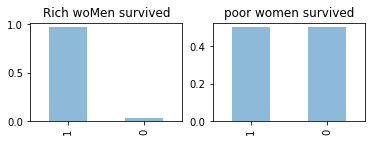

In [11]:

plt.subplot2grid((2,2),(0,0))
df.Survived[(df.Sex == 'female') & (df.Pclass == 1)].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Rich woMen survived')

plt.subplot2grid((2,2),(0,1))
df.Survived[(df.Sex == 'female') & (df.Pclass == 3)].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('poor women survived')


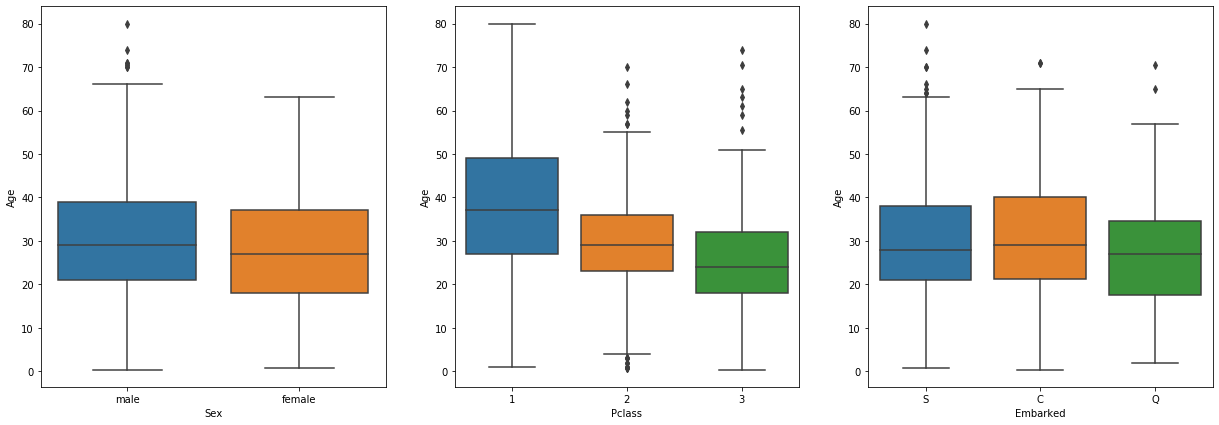

In [90]:
f, axes = plt.subplots(1, 3, figsize=(21, 7))
g = sns.boxplot(x="Sex", y="Age", data=df, ax=axes[0])
g = sns.boxplot(x="Pclass", y="Age", data=df, ax=axes[1])
g = sns.boxplot(x="Embarked",y="Age", data=df, ax=axes[2])


In [27]:
train['hypo'] = 0
train.loc[df.Sex == 'female', 'hypo'] = 1
train['Result'] = 0
train.loc[train.Survived == train['hypo'],'Result'] = 1

#print(train['Result'].value_counts(normalize=True))
#train.Result
test['hypo'] = 0
test.loc[df.Sex == 'female', 'hypo'] = 1
test['Result'] = 0
#test.loc[test.Survived == test['hypo'],'Result'] = 1
#print(test['Result'].value_counts(normalize=True))
submission = pd.merge(df.iloc[:, :1], test.Result,  left_index=True, right_index=True)
submission
submission.to_csv(r"E:\titanic\submission.csv", index = False)

In [43]:
from sklearn import linear_model, preprocessing
train = pd.read_csv(r"E:\titanic\train.csv")

def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] = data['Age'].fillna(data['Age'].median())
    
    data.loc[data['Sex'] == 'male','Sex'] = 0
    data.loc[data['Sex'] == 'female','Sex'] = 1
    
    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data['Embarked'] == 'S', 'Embarked'] = 0
    data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
    data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2
#import utils
clean_data(train)

target = train[['Survived']].values
features = train[['Pclass','Age','Sex','SibSp','Parch']].values

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)
print(classifier_.score(features, target))
test = pd.read_csv(r"E:\titanic\test.csv")
clean_data(test)
features_ = test[['Pclass','Age','Sex','SibSp','Parch']].values
prediction_values = classifier.predict(features_)
test['Survived'] = prediction_values
submission = pd.merge(test.iloc[:, :1], test.Survived,  left_index=True, right_index=True)
submission.to_csv(r"E:\titanic\submission.csv", index = False)
#test['Survived']

0.7912457912457912


c:\users\nikhil\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
from sklearn import linear_model, preprocessing

poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
print(classifier_.score(poly_features, target))

c:\users\nikhil\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8249158249158249


c:\users\nikhil\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
from sklearn import tree, model_selection

target = train[['Survived']].values
features_names = ['Pclass','Age','Sex','SibSp','Parch']
features = train[features_names].values

genralized_tree = tree.DecisionTreeClassifier(random_state = 1, max_depth = 7,min_samples_split =2)
genralized_tree_ = genralized_tree.fit(features, target)

print(genralized_tree.score(features, target))
scores = model_selection.cross_val_score(genralized_tree, features, target, scoring='accuracy', cv=50)
#print(scores)
#print(scores.mean())
tree.export_graphviz(genralized_tree_, feature_names=features_names, out_file=r"E:\titanic\tree.dot")


test = pd.read_csv(r"E:\titanic\test.csv")
clean_data(test)

features_ = test[['Pclass','Age','Sex','SibSp','Parch']].values
prediction_values = genralized_tree.predict(features_)
test['Survived'] = prediction_values
submission = pd.merge(test.iloc[:, :1], test.Survived,  left_index=True, right_index=True)
submission.to_csv(r"E:\titanic\submission.csv", index = False)
#test['Survived']
test

ValueError: could not convert string to float: 'male'

In [70]:
#train.isnull().sum()
prediction_values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,